# Deep learning framework example: MNIST dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.


**Important**: Please see the Iris notebook example first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
import sys
import logging
from zensols.config import ExtendedInterpolationEnvConfig as AppConfig
from zensols.config import ImportConfigFactory
from zensols.deeplearn.result import ModelResultGrapher
from zensols.deeplearn import TorchConfig

# set up notebook environment
app_root_dir = '..'
sys.path.append(app_root_dir + '/src/python')
sys.path.append(app_root_dir + '/test/python')

# configure logging
logging.basicConfig(format='%(asctime)-15s %(name)s [%(levelname)s]: %(message)s', level=logging.WARNING)
logging.getLogger('zensols.deeplearn.batch.stash').setLevel(logging.INFO)
logging.getLogger('zensols.deeplearn.model.facade').setLevel(logging.INFO)

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(app_root_dir + '/test-resources/mnist/mnist.conf',
                   env={'app_root': app_root_dir})

# create a factoty that instantiates Python objects using a simple configuration (INI)
factory = ImportConfigFactory(config)

## Create the model facade

Create the facade with a factory, which in turn creates the executor.  The statistics on the data set that is configured on the executor is, by default, printed to standard out.  You can set the `writer` property to `None` on the facade to disable this.

In [2]:
from zensols.deeplearn.model import ModelFacade
facade = ModelFacade(factory, cache_executor=True, cache_batches=True)

## Train and test the model

This trains the model on the Iris (flower) data set and prints the results.  The PyTorch model itself is also printed.

Note that in this step, all batches are loaded and logged.  This example shows that with `cache_executor` and `cache_batches` set to `True`, batches are not reloaded.  This saves time in terms of allocating, decoding and then deallocating CPU/GPU memory, especially when tuning hyperparameters and re-running for large datasets.

In [3]:
facade.train()
default_res = facade.test()

feature splits:
    split stash splits:
        train: 48000 (68.6%)
        val: 12000 (17.1%)
        test: 10000 (14.3%)
        total: 70000
    total this instance: 70000
    keys consistent: True
batch splits:
    split stash splits:
        train: 2400 (68.6%)
        val: 600 (17.1%)
        test: 500 (14.3%)
        total: 3500


2020-06-15 19:47:02,724 zensols.deeplearn.model.facade [INFO]: training...
2020-06-15 19:47:02,728 zensols.deeplearn.batch.stash [INFO]: loaded batch 0 (train) in 0s
2020-06-15 19:47:02,730 zensols.deeplearn.batch.stash [INFO]: loaded batch 1 (train) in 0s
2020-06-15 19:47:02,731 zensols.deeplearn.batch.stash [INFO]: loaded batch 2 (train) in 0s
2020-06-15 19:47:02,732 zensols.deeplearn.batch.stash [INFO]: loaded batch 3 (train) in 0s
2020-06-15 19:47:02,734 zensols.deeplearn.batch.stash [INFO]: loaded batch 4 (train) in 0s
2020-06-15 19:47:02,735 zensols.deeplearn.batch.stash [INFO]: loaded batch 5 (train) in 0s
2020-06-15 19:47:02,736 zensols.deeplearn.batch.stash [INFO]: loaded batch 6 (train) in 0s
2020-06-15 19:47:02,738 zensols.deeplearn.batch.stash [INFO]: loaded batch 7 (train) in 0s
2020-06-15 19:47:02,739 zensols.deeplearn.batch.stash [INFO]: loaded batch 8 (train) in 0s
2020-06-15 19:47:02,741 zensols.deeplearn.batch.stash [INFO]: loaded batch 9 (train) in 0s
2020-06-15 19:4

2020-06-15 19:47:02,853 zensols.deeplearn.batch.stash [INFO]: loaded batch 89 (train) in 0s
2020-06-15 19:47:02,854 zensols.deeplearn.batch.stash [INFO]: loaded batch 90 (train) in 0s
2020-06-15 19:47:02,856 zensols.deeplearn.batch.stash [INFO]: loaded batch 91 (train) in 0s
2020-06-15 19:47:02,857 zensols.deeplearn.batch.stash [INFO]: loaded batch 92 (train) in 0s
2020-06-15 19:47:02,858 zensols.deeplearn.batch.stash [INFO]: loaded batch 93 (train) in 0s
2020-06-15 19:47:02,860 zensols.deeplearn.batch.stash [INFO]: loaded batch 94 (train) in 0s
2020-06-15 19:47:02,861 zensols.deeplearn.batch.stash [INFO]: loaded batch 95 (train) in 0s
2020-06-15 19:47:02,862 zensols.deeplearn.batch.stash [INFO]: loaded batch 96 (train) in 0s
2020-06-15 19:47:02,864 zensols.deeplearn.batch.stash [INFO]: loaded batch 97 (train) in 0s
2020-06-15 19:47:02,865 zensols.deeplearn.batch.stash [INFO]: loaded batch 98 (train) in 0s
2020-06-15 19:47:02,867 zensols.deeplearn.batch.stash [INFO]: loaded batch 99 (t

    total this instance: 3500
    keys consistent: True


2020-06-15 19:47:02,926 zensols.deeplearn.batch.stash [INFO]: loaded batch 144 (train) in 0s
2020-06-15 19:47:02,927 zensols.deeplearn.batch.stash [INFO]: loaded batch 145 (train) in 0s
2020-06-15 19:47:02,929 zensols.deeplearn.batch.stash [INFO]: loaded batch 146 (train) in 0s
2020-06-15 19:47:02,930 zensols.deeplearn.batch.stash [INFO]: loaded batch 147 (train) in 0s
2020-06-15 19:47:02,931 zensols.deeplearn.batch.stash [INFO]: loaded batch 148 (train) in 0s
2020-06-15 19:47:02,933 zensols.deeplearn.batch.stash [INFO]: loaded batch 149 (train) in 0s
2020-06-15 19:47:02,934 zensols.deeplearn.batch.stash [INFO]: loaded batch 150 (train) in 0s
2020-06-15 19:47:02,935 zensols.deeplearn.batch.stash [INFO]: loaded batch 151 (train) in 0s
2020-06-15 19:47:02,937 zensols.deeplearn.batch.stash [INFO]: loaded batch 152 (train) in 0s
2020-06-15 19:47:02,938 zensols.deeplearn.batch.stash [INFO]: loaded batch 153 (train) in 0s
2020-06-15 19:47:02,939 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:03,042 zensols.deeplearn.batch.stash [INFO]: loaded batch 233 (train) in 0s
2020-06-15 19:47:03,043 zensols.deeplearn.batch.stash [INFO]: loaded batch 234 (train) in 0s
2020-06-15 19:47:03,044 zensols.deeplearn.batch.stash [INFO]: loaded batch 235 (train) in 0s
2020-06-15 19:47:03,046 zensols.deeplearn.batch.stash [INFO]: loaded batch 236 (train) in 0s
2020-06-15 19:47:03,047 zensols.deeplearn.batch.stash [INFO]: loaded batch 237 (train) in 0s
2020-06-15 19:47:03,049 zensols.deeplearn.batch.stash [INFO]: loaded batch 238 (train) in 0s
2020-06-15 19:47:03,050 zensols.deeplearn.batch.stash [INFO]: loaded batch 239 (train) in 0s
2020-06-15 19:47:03,051 zensols.deeplearn.batch.stash [INFO]: loaded batch 240 (train) in 0s
2020-06-15 19:47:03,053 zensols.deeplearn.batch.stash [INFO]: loaded batch 241 (train) in 0s
2020-06-15 19:47:03,054 zensols.deeplearn.batch.stash [INFO]: loaded batch 242 (train) in 0s
2020-06-15 19:47:03,055 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:03,165 zensols.deeplearn.batch.stash [INFO]: loaded batch 322 (train) in 0s
2020-06-15 19:47:03,166 zensols.deeplearn.batch.stash [INFO]: loaded batch 323 (train) in 0s
2020-06-15 19:47:03,168 zensols.deeplearn.batch.stash [INFO]: loaded batch 324 (train) in 0s
2020-06-15 19:47:03,169 zensols.deeplearn.batch.stash [INFO]: loaded batch 325 (train) in 0s
2020-06-15 19:47:03,171 zensols.deeplearn.batch.stash [INFO]: loaded batch 326 (train) in 0s
2020-06-15 19:47:03,172 zensols.deeplearn.batch.stash [INFO]: loaded batch 327 (train) in 0s
2020-06-15 19:47:03,173 zensols.deeplearn.batch.stash [INFO]: loaded batch 328 (train) in 0s
2020-06-15 19:47:03,175 zensols.deeplearn.batch.stash [INFO]: loaded batch 329 (train) in 0s
2020-06-15 19:47:03,176 zensols.deeplearn.batch.stash [INFO]: loaded batch 330 (train) in 0s
2020-06-15 19:47:03,177 zensols.deeplearn.batch.stash [INFO]: loaded batch 331 (train) in 0s
2020-06-15 19:47:03,179 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:03,289 zensols.deeplearn.batch.stash [INFO]: loaded batch 411 (train) in 0s
2020-06-15 19:47:03,290 zensols.deeplearn.batch.stash [INFO]: loaded batch 412 (train) in 0s
2020-06-15 19:47:03,292 zensols.deeplearn.batch.stash [INFO]: loaded batch 413 (train) in 0s
2020-06-15 19:47:03,293 zensols.deeplearn.batch.stash [INFO]: loaded batch 414 (train) in 0s
2020-06-15 19:47:03,294 zensols.deeplearn.batch.stash [INFO]: loaded batch 415 (train) in 0s
2020-06-15 19:47:03,296 zensols.deeplearn.batch.stash [INFO]: loaded batch 416 (train) in 0s
2020-06-15 19:47:03,297 zensols.deeplearn.batch.stash [INFO]: loaded batch 417 (train) in 0s
2020-06-15 19:47:03,299 zensols.deeplearn.batch.stash [INFO]: loaded batch 418 (train) in 0s
2020-06-15 19:47:03,300 zensols.deeplearn.batch.stash [INFO]: loaded batch 419 (train) in 0s
2020-06-15 19:47:03,301 zensols.deeplearn.batch.stash [INFO]: loaded batch 420 (train) in 0s
2020-06-15 19:47:03,303 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:03,413 zensols.deeplearn.batch.stash [INFO]: loaded batch 500 (train) in 0s
2020-06-15 19:47:03,415 zensols.deeplearn.batch.stash [INFO]: loaded batch 501 (train) in 0s
2020-06-15 19:47:03,416 zensols.deeplearn.batch.stash [INFO]: loaded batch 502 (train) in 0s
2020-06-15 19:47:03,417 zensols.deeplearn.batch.stash [INFO]: loaded batch 503 (train) in 0s
2020-06-15 19:47:03,419 zensols.deeplearn.batch.stash [INFO]: loaded batch 504 (train) in 0s
2020-06-15 19:47:03,420 zensols.deeplearn.batch.stash [INFO]: loaded batch 505 (train) in 0s
2020-06-15 19:47:03,421 zensols.deeplearn.batch.stash [INFO]: loaded batch 506 (train) in 0s
2020-06-15 19:47:03,423 zensols.deeplearn.batch.stash [INFO]: loaded batch 507 (train) in 0s
2020-06-15 19:47:03,424 zensols.deeplearn.batch.stash [INFO]: loaded batch 508 (train) in 0s
2020-06-15 19:47:03,425 zensols.deeplearn.batch.stash [INFO]: loaded batch 509 (train) in 0s
2020-06-15 19:47:03,427 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:03,532 zensols.deeplearn.batch.stash [INFO]: loaded batch 589 (train) in 0s
2020-06-15 19:47:03,534 zensols.deeplearn.batch.stash [INFO]: loaded batch 590 (train) in 0s
2020-06-15 19:47:03,535 zensols.deeplearn.batch.stash [INFO]: loaded batch 591 (train) in 0s
2020-06-15 19:47:03,536 zensols.deeplearn.batch.stash [INFO]: loaded batch 592 (train) in 0s
2020-06-15 19:47:03,537 zensols.deeplearn.batch.stash [INFO]: loaded batch 593 (train) in 0s
2020-06-15 19:47:03,539 zensols.deeplearn.batch.stash [INFO]: loaded batch 594 (train) in 0s
2020-06-15 19:47:03,540 zensols.deeplearn.batch.stash [INFO]: loaded batch 595 (train) in 0s
2020-06-15 19:47:03,541 zensols.deeplearn.batch.stash [INFO]: loaded batch 596 (train) in 0s
2020-06-15 19:47:03,543 zensols.deeplearn.batch.stash [INFO]: loaded batch 597 (train) in 0s
2020-06-15 19:47:03,544 zensols.deeplearn.batch.stash [INFO]: loaded batch 598 (train) in 0s
2020-06-15 19:47:03,545 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:03,650 zensols.deeplearn.batch.stash [INFO]: loaded batch 678 (train) in 0s
2020-06-15 19:47:03,652 zensols.deeplearn.batch.stash [INFO]: loaded batch 679 (train) in 0s
2020-06-15 19:47:03,653 zensols.deeplearn.batch.stash [INFO]: loaded batch 680 (train) in 0s
2020-06-15 19:47:03,654 zensols.deeplearn.batch.stash [INFO]: loaded batch 681 (train) in 0s
2020-06-15 19:47:03,656 zensols.deeplearn.batch.stash [INFO]: loaded batch 682 (train) in 0s
2020-06-15 19:47:03,657 zensols.deeplearn.batch.stash [INFO]: loaded batch 683 (train) in 0s
2020-06-15 19:47:03,659 zensols.deeplearn.batch.stash [INFO]: loaded batch 684 (train) in 0s
2020-06-15 19:47:03,660 zensols.deeplearn.batch.stash [INFO]: loaded batch 685 (train) in 0s
2020-06-15 19:47:03,661 zensols.deeplearn.batch.stash [INFO]: loaded batch 686 (train) in 0s
2020-06-15 19:47:03,663 zensols.deeplearn.batch.stash [INFO]: loaded batch 687 (train) in 0s
2020-06-15 19:47:03,664 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:03,774 zensols.deeplearn.batch.stash [INFO]: loaded batch 767 (train) in 0s
2020-06-15 19:47:03,775 zensols.deeplearn.batch.stash [INFO]: loaded batch 768 (train) in 0s
2020-06-15 19:47:03,777 zensols.deeplearn.batch.stash [INFO]: loaded batch 769 (train) in 0s
2020-06-15 19:47:03,778 zensols.deeplearn.batch.stash [INFO]: loaded batch 770 (train) in 0s
2020-06-15 19:47:03,779 zensols.deeplearn.batch.stash [INFO]: loaded batch 771 (train) in 0s
2020-06-15 19:47:03,781 zensols.deeplearn.batch.stash [INFO]: loaded batch 772 (train) in 0s
2020-06-15 19:47:03,782 zensols.deeplearn.batch.stash [INFO]: loaded batch 773 (train) in 0s
2020-06-15 19:47:03,784 zensols.deeplearn.batch.stash [INFO]: loaded batch 774 (train) in 0s
2020-06-15 19:47:03,785 zensols.deeplearn.batch.stash [INFO]: loaded batch 775 (train) in 0s
2020-06-15 19:47:03,786 zensols.deeplearn.batch.stash [INFO]: loaded batch 776 (train) in 0s
2020-06-15 19:47:03,788 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:03,895 zensols.deeplearn.batch.stash [INFO]: loaded batch 856 (train) in 0s
2020-06-15 19:47:03,896 zensols.deeplearn.batch.stash [INFO]: loaded batch 857 (train) in 0s
2020-06-15 19:47:03,897 zensols.deeplearn.batch.stash [INFO]: loaded batch 858 (train) in 0s
2020-06-15 19:47:03,899 zensols.deeplearn.batch.stash [INFO]: loaded batch 859 (train) in 0s
2020-06-15 19:47:03,900 zensols.deeplearn.batch.stash [INFO]: loaded batch 860 (train) in 0s
2020-06-15 19:47:03,901 zensols.deeplearn.batch.stash [INFO]: loaded batch 861 (train) in 0s
2020-06-15 19:47:03,903 zensols.deeplearn.batch.stash [INFO]: loaded batch 862 (train) in 0s
2020-06-15 19:47:03,904 zensols.deeplearn.batch.stash [INFO]: loaded batch 863 (train) in 0s
2020-06-15 19:47:03,905 zensols.deeplearn.batch.stash [INFO]: loaded batch 864 (train) in 0s
2020-06-15 19:47:03,906 zensols.deeplearn.batch.stash [INFO]: loaded batch 865 (train) in 0s
2020-06-15 19:47:03,908 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:04,011 zensols.deeplearn.batch.stash [INFO]: loaded batch 945 (train) in 0s
2020-06-15 19:47:04,012 zensols.deeplearn.batch.stash [INFO]: loaded batch 946 (train) in 0s
2020-06-15 19:47:04,014 zensols.deeplearn.batch.stash [INFO]: loaded batch 947 (train) in 0s
2020-06-15 19:47:04,015 zensols.deeplearn.batch.stash [INFO]: loaded batch 948 (train) in 0s
2020-06-15 19:47:04,016 zensols.deeplearn.batch.stash [INFO]: loaded batch 949 (train) in 0s
2020-06-15 19:47:04,018 zensols.deeplearn.batch.stash [INFO]: loaded batch 950 (train) in 0s
2020-06-15 19:47:04,019 zensols.deeplearn.batch.stash [INFO]: loaded batch 951 (train) in 0s
2020-06-15 19:47:04,020 zensols.deeplearn.batch.stash [INFO]: loaded batch 952 (train) in 0s
2020-06-15 19:47:04,021 zensols.deeplearn.batch.stash [INFO]: loaded batch 953 (train) in 0s
2020-06-15 19:47:04,023 zensols.deeplearn.batch.stash [INFO]: loaded batch 954 (train) in 0s
2020-06-15 19:47:04,024 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:47:04,128 zensols.deeplearn.batch.stash [INFO]: loaded batch 1033 (train) in 0s
2020-06-15 19:47:04,129 zensols.deeplearn.batch.stash [INFO]: loaded batch 1034 (train) in 0s
2020-06-15 19:47:04,131 zensols.deeplearn.batch.stash [INFO]: loaded batch 1035 (train) in 0s
2020-06-15 19:47:04,132 zensols.deeplearn.batch.stash [INFO]: loaded batch 1036 (train) in 0s
2020-06-15 19:47:04,134 zensols.deeplearn.batch.stash [INFO]: loaded batch 1037 (train) in 0s
2020-06-15 19:47:04,135 zensols.deeplearn.batch.stash [INFO]: loaded batch 1038 (train) in 0s
2020-06-15 19:47:04,137 zensols.deeplearn.batch.stash [INFO]: loaded batch 1039 (train) in 0s
2020-06-15 19:47:04,138 zensols.deeplearn.batch.stash [INFO]: loaded batch 1040 (train) in 0s
2020-06-15 19:47:04,139 zensols.deeplearn.batch.stash [INFO]: loaded batch 1041 (train) in 0s
2020-06-15 19:47:04,141 zensols.deeplearn.batch.stash [INFO]: loaded batch 1042 (train) in 0s
2020-06-15 19:47:04,142 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:04,250 zensols.deeplearn.batch.stash [INFO]: loaded batch 1121 (train) in 0s
2020-06-15 19:47:04,252 zensols.deeplearn.batch.stash [INFO]: loaded batch 1122 (train) in 0s
2020-06-15 19:47:04,253 zensols.deeplearn.batch.stash [INFO]: loaded batch 1123 (train) in 0s
2020-06-15 19:47:04,255 zensols.deeplearn.batch.stash [INFO]: loaded batch 1124 (train) in 0s
2020-06-15 19:47:04,256 zensols.deeplearn.batch.stash [INFO]: loaded batch 1125 (train) in 0s
2020-06-15 19:47:04,257 zensols.deeplearn.batch.stash [INFO]: loaded batch 1126 (train) in 0s
2020-06-15 19:47:04,259 zensols.deeplearn.batch.stash [INFO]: loaded batch 1127 (train) in 0s
2020-06-15 19:47:04,260 zensols.deeplearn.batch.stash [INFO]: loaded batch 1128 (train) in 0s
2020-06-15 19:47:04,262 zensols.deeplearn.batch.stash [INFO]: loaded batch 1129 (train) in 0s
2020-06-15 19:47:04,263 zensols.deeplearn.batch.stash [INFO]: loaded batch 1130 (train) in 0s
2020-06-15 19:47:04,264 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:04,366 zensols.deeplearn.batch.stash [INFO]: loaded batch 1209 (train) in 0s
2020-06-15 19:47:04,367 zensols.deeplearn.batch.stash [INFO]: loaded batch 1210 (train) in 0s
2020-06-15 19:47:04,368 zensols.deeplearn.batch.stash [INFO]: loaded batch 1211 (train) in 0s
2020-06-15 19:47:04,370 zensols.deeplearn.batch.stash [INFO]: loaded batch 1212 (train) in 0s
2020-06-15 19:47:04,371 zensols.deeplearn.batch.stash [INFO]: loaded batch 1213 (train) in 0s
2020-06-15 19:47:04,372 zensols.deeplearn.batch.stash [INFO]: loaded batch 1214 (train) in 0s
2020-06-15 19:47:04,373 zensols.deeplearn.batch.stash [INFO]: loaded batch 1215 (train) in 0s
2020-06-15 19:47:04,375 zensols.deeplearn.batch.stash [INFO]: loaded batch 1216 (train) in 0s
2020-06-15 19:47:04,376 zensols.deeplearn.batch.stash [INFO]: loaded batch 1217 (train) in 0s
2020-06-15 19:47:04,377 zensols.deeplearn.batch.stash [INFO]: loaded batch 1218 (train) in 0s
2020-06-15 19:47:04,378 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:04,478 zensols.deeplearn.batch.stash [INFO]: loaded batch 1297 (train) in 0s
2020-06-15 19:47:04,480 zensols.deeplearn.batch.stash [INFO]: loaded batch 1298 (train) in 0s
2020-06-15 19:47:04,481 zensols.deeplearn.batch.stash [INFO]: loaded batch 1299 (train) in 0s
2020-06-15 19:47:04,482 zensols.deeplearn.batch.stash [INFO]: loaded batch 1300 (train) in 0s
2020-06-15 19:47:04,483 zensols.deeplearn.batch.stash [INFO]: loaded batch 1301 (train) in 0s
2020-06-15 19:47:04,485 zensols.deeplearn.batch.stash [INFO]: loaded batch 1302 (train) in 0s
2020-06-15 19:47:04,486 zensols.deeplearn.batch.stash [INFO]: loaded batch 1303 (train) in 0s
2020-06-15 19:47:04,487 zensols.deeplearn.batch.stash [INFO]: loaded batch 1304 (train) in 0s
2020-06-15 19:47:04,488 zensols.deeplearn.batch.stash [INFO]: loaded batch 1305 (train) in 0s
2020-06-15 19:47:04,490 zensols.deeplearn.batch.stash [INFO]: loaded batch 1306 (train) in 0s
2020-06-15 19:47:04,491 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:04,591 zensols.deeplearn.batch.stash [INFO]: loaded batch 1385 (train) in 0s
2020-06-15 19:47:04,593 zensols.deeplearn.batch.stash [INFO]: loaded batch 1386 (train) in 0s
2020-06-15 19:47:04,594 zensols.deeplearn.batch.stash [INFO]: loaded batch 1387 (train) in 0s
2020-06-15 19:47:04,595 zensols.deeplearn.batch.stash [INFO]: loaded batch 1388 (train) in 0s
2020-06-15 19:47:04,596 zensols.deeplearn.batch.stash [INFO]: loaded batch 1389 (train) in 0s
2020-06-15 19:47:04,598 zensols.deeplearn.batch.stash [INFO]: loaded batch 1390 (train) in 0s
2020-06-15 19:47:04,599 zensols.deeplearn.batch.stash [INFO]: loaded batch 1391 (train) in 0s
2020-06-15 19:47:04,602 zensols.deeplearn.batch.stash [INFO]: loaded batch 1392 (train) in 0s
2020-06-15 19:47:04,603 zensols.deeplearn.batch.stash [INFO]: loaded batch 1393 (train) in 0s
2020-06-15 19:47:04,605 zensols.deeplearn.batch.stash [INFO]: loaded batch 1394 (train) in 0s
2020-06-15 19:47:04,606 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:04,706 zensols.deeplearn.batch.stash [INFO]: loaded batch 1473 (train) in 0s
2020-06-15 19:47:04,707 zensols.deeplearn.batch.stash [INFO]: loaded batch 1474 (train) in 0s
2020-06-15 19:47:04,708 zensols.deeplearn.batch.stash [INFO]: loaded batch 1475 (train) in 0s
2020-06-15 19:47:04,709 zensols.deeplearn.batch.stash [INFO]: loaded batch 1476 (train) in 0s
2020-06-15 19:47:04,711 zensols.deeplearn.batch.stash [INFO]: loaded batch 1477 (train) in 0s
2020-06-15 19:47:04,712 zensols.deeplearn.batch.stash [INFO]: loaded batch 1478 (train) in 0s
2020-06-15 19:47:04,713 zensols.deeplearn.batch.stash [INFO]: loaded batch 1479 (train) in 0s
2020-06-15 19:47:04,715 zensols.deeplearn.batch.stash [INFO]: loaded batch 1480 (train) in 0s
2020-06-15 19:47:04,716 zensols.deeplearn.batch.stash [INFO]: loaded batch 1481 (train) in 0s
2020-06-15 19:47:04,717 zensols.deeplearn.batch.stash [INFO]: loaded batch 1482 (train) in 0s
2020-06-15 19:47:04,718 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:04,819 zensols.deeplearn.batch.stash [INFO]: loaded batch 1561 (train) in 0s
2020-06-15 19:47:04,820 zensols.deeplearn.batch.stash [INFO]: loaded batch 1562 (train) in 0s
2020-06-15 19:47:04,821 zensols.deeplearn.batch.stash [INFO]: loaded batch 1563 (train) in 0s
2020-06-15 19:47:04,823 zensols.deeplearn.batch.stash [INFO]: loaded batch 1564 (train) in 0s
2020-06-15 19:47:04,824 zensols.deeplearn.batch.stash [INFO]: loaded batch 1565 (train) in 0s
2020-06-15 19:47:04,825 zensols.deeplearn.batch.stash [INFO]: loaded batch 1566 (train) in 0s
2020-06-15 19:47:04,827 zensols.deeplearn.batch.stash [INFO]: loaded batch 1567 (train) in 0s
2020-06-15 19:47:04,828 zensols.deeplearn.batch.stash [INFO]: loaded batch 1568 (train) in 0s
2020-06-15 19:47:04,829 zensols.deeplearn.batch.stash [INFO]: loaded batch 1569 (train) in 0s
2020-06-15 19:47:04,830 zensols.deeplearn.batch.stash [INFO]: loaded batch 1570 (train) in 0s
2020-06-15 19:47:04,832 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:04,932 zensols.deeplearn.batch.stash [INFO]: loaded batch 1649 (train) in 0s
2020-06-15 19:47:04,934 zensols.deeplearn.batch.stash [INFO]: loaded batch 1650 (train) in 0s
2020-06-15 19:47:04,935 zensols.deeplearn.batch.stash [INFO]: loaded batch 1651 (train) in 0s
2020-06-15 19:47:04,936 zensols.deeplearn.batch.stash [INFO]: loaded batch 1652 (train) in 0s
2020-06-15 19:47:04,937 zensols.deeplearn.batch.stash [INFO]: loaded batch 1653 (train) in 0s
2020-06-15 19:47:04,939 zensols.deeplearn.batch.stash [INFO]: loaded batch 1654 (train) in 0s
2020-06-15 19:47:04,940 zensols.deeplearn.batch.stash [INFO]: loaded batch 1655 (train) in 0s
2020-06-15 19:47:04,941 zensols.deeplearn.batch.stash [INFO]: loaded batch 1656 (train) in 0s
2020-06-15 19:47:04,943 zensols.deeplearn.batch.stash [INFO]: loaded batch 1657 (train) in 0s
2020-06-15 19:47:04,944 zensols.deeplearn.batch.stash [INFO]: loaded batch 1658 (train) in 0s
2020-06-15 19:47:04,945 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:05,046 zensols.deeplearn.batch.stash [INFO]: loaded batch 1737 (train) in 0s
2020-06-15 19:47:05,047 zensols.deeplearn.batch.stash [INFO]: loaded batch 1738 (train) in 0s
2020-06-15 19:47:05,048 zensols.deeplearn.batch.stash [INFO]: loaded batch 1739 (train) in 0s
2020-06-15 19:47:05,050 zensols.deeplearn.batch.stash [INFO]: loaded batch 1740 (train) in 0s
2020-06-15 19:47:05,051 zensols.deeplearn.batch.stash [INFO]: loaded batch 1741 (train) in 0s
2020-06-15 19:47:05,052 zensols.deeplearn.batch.stash [INFO]: loaded batch 1742 (train) in 0s
2020-06-15 19:47:05,054 zensols.deeplearn.batch.stash [INFO]: loaded batch 1743 (train) in 0s
2020-06-15 19:47:05,055 zensols.deeplearn.batch.stash [INFO]: loaded batch 1744 (train) in 0s
2020-06-15 19:47:05,056 zensols.deeplearn.batch.stash [INFO]: loaded batch 1745 (train) in 0s
2020-06-15 19:47:05,057 zensols.deeplearn.batch.stash [INFO]: loaded batch 1746 (train) in 0s
2020-06-15 19:47:05,059 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:05,159 zensols.deeplearn.batch.stash [INFO]: loaded batch 1825 (train) in 0s
2020-06-15 19:47:05,160 zensols.deeplearn.batch.stash [INFO]: loaded batch 1826 (train) in 0s
2020-06-15 19:47:05,161 zensols.deeplearn.batch.stash [INFO]: loaded batch 1827 (train) in 0s
2020-06-15 19:47:05,163 zensols.deeplearn.batch.stash [INFO]: loaded batch 1828 (train) in 0s
2020-06-15 19:47:05,164 zensols.deeplearn.batch.stash [INFO]: loaded batch 1829 (train) in 0s
2020-06-15 19:47:05,165 zensols.deeplearn.batch.stash [INFO]: loaded batch 1830 (train) in 0s
2020-06-15 19:47:05,166 zensols.deeplearn.batch.stash [INFO]: loaded batch 1831 (train) in 0s
2020-06-15 19:47:05,168 zensols.deeplearn.batch.stash [INFO]: loaded batch 1832 (train) in 0s
2020-06-15 19:47:05,169 zensols.deeplearn.batch.stash [INFO]: loaded batch 1833 (train) in 0s
2020-06-15 19:47:05,170 zensols.deeplearn.batch.stash [INFO]: loaded batch 1834 (train) in 0s
2020-06-15 19:47:05,172 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:05,272 zensols.deeplearn.batch.stash [INFO]: loaded batch 1913 (train) in 0s
2020-06-15 19:47:05,274 zensols.deeplearn.batch.stash [INFO]: loaded batch 1914 (train) in 0s
2020-06-15 19:47:05,275 zensols.deeplearn.batch.stash [INFO]: loaded batch 1915 (train) in 0s
2020-06-15 19:47:05,276 zensols.deeplearn.batch.stash [INFO]: loaded batch 1916 (train) in 0s
2020-06-15 19:47:05,277 zensols.deeplearn.batch.stash [INFO]: loaded batch 1917 (train) in 0s
2020-06-15 19:47:05,279 zensols.deeplearn.batch.stash [INFO]: loaded batch 1918 (train) in 0s
2020-06-15 19:47:05,280 zensols.deeplearn.batch.stash [INFO]: loaded batch 1919 (train) in 0s
2020-06-15 19:47:05,281 zensols.deeplearn.batch.stash [INFO]: loaded batch 1920 (train) in 0s
2020-06-15 19:47:05,282 zensols.deeplearn.batch.stash [INFO]: loaded batch 1921 (train) in 0s
2020-06-15 19:47:05,284 zensols.deeplearn.batch.stash [INFO]: loaded batch 1922 (train) in 0s
2020-06-15 19:47:05,285 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:05,384 zensols.deeplearn.batch.stash [INFO]: loaded batch 2001 (train) in 0s
2020-06-15 19:47:05,386 zensols.deeplearn.batch.stash [INFO]: loaded batch 2002 (train) in 0s
2020-06-15 19:47:05,387 zensols.deeplearn.batch.stash [INFO]: loaded batch 2003 (train) in 0s
2020-06-15 19:47:05,388 zensols.deeplearn.batch.stash [INFO]: loaded batch 2004 (train) in 0s
2020-06-15 19:47:05,389 zensols.deeplearn.batch.stash [INFO]: loaded batch 2005 (train) in 0s
2020-06-15 19:47:05,391 zensols.deeplearn.batch.stash [INFO]: loaded batch 2006 (train) in 0s
2020-06-15 19:47:05,392 zensols.deeplearn.batch.stash [INFO]: loaded batch 2007 (train) in 0s
2020-06-15 19:47:05,393 zensols.deeplearn.batch.stash [INFO]: loaded batch 2008 (train) in 0s
2020-06-15 19:47:05,394 zensols.deeplearn.batch.stash [INFO]: loaded batch 2009 (train) in 0s
2020-06-15 19:47:05,396 zensols.deeplearn.batch.stash [INFO]: loaded batch 2010 (train) in 0s
2020-06-15 19:47:05,397 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:05,496 zensols.deeplearn.batch.stash [INFO]: loaded batch 2089 (train) in 0s
2020-06-15 19:47:05,497 zensols.deeplearn.batch.stash [INFO]: loaded batch 2090 (train) in 0s
2020-06-15 19:47:05,499 zensols.deeplearn.batch.stash [INFO]: loaded batch 2091 (train) in 0s
2020-06-15 19:47:05,500 zensols.deeplearn.batch.stash [INFO]: loaded batch 2092 (train) in 0s
2020-06-15 19:47:05,501 zensols.deeplearn.batch.stash [INFO]: loaded batch 2093 (train) in 0s
2020-06-15 19:47:05,503 zensols.deeplearn.batch.stash [INFO]: loaded batch 2094 (train) in 0s
2020-06-15 19:47:05,504 zensols.deeplearn.batch.stash [INFO]: loaded batch 2095 (train) in 0s
2020-06-15 19:47:05,505 zensols.deeplearn.batch.stash [INFO]: loaded batch 2096 (train) in 0s
2020-06-15 19:47:05,507 zensols.deeplearn.batch.stash [INFO]: loaded batch 2097 (train) in 0s
2020-06-15 19:47:05,508 zensols.deeplearn.batch.stash [INFO]: loaded batch 2098 (train) in 0s
2020-06-15 19:47:05,509 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:05,608 zensols.deeplearn.batch.stash [INFO]: loaded batch 2177 (train) in 0s
2020-06-15 19:47:05,610 zensols.deeplearn.batch.stash [INFO]: loaded batch 2178 (train) in 0s
2020-06-15 19:47:05,611 zensols.deeplearn.batch.stash [INFO]: loaded batch 2179 (train) in 0s
2020-06-15 19:47:05,612 zensols.deeplearn.batch.stash [INFO]: loaded batch 2180 (train) in 0s
2020-06-15 19:47:05,613 zensols.deeplearn.batch.stash [INFO]: loaded batch 2181 (train) in 0s
2020-06-15 19:47:05,615 zensols.deeplearn.batch.stash [INFO]: loaded batch 2182 (train) in 0s
2020-06-15 19:47:05,616 zensols.deeplearn.batch.stash [INFO]: loaded batch 2183 (train) in 0s
2020-06-15 19:47:05,617 zensols.deeplearn.batch.stash [INFO]: loaded batch 2184 (train) in 0s
2020-06-15 19:47:05,619 zensols.deeplearn.batch.stash [INFO]: loaded batch 2185 (train) in 0s
2020-06-15 19:47:05,620 zensols.deeplearn.batch.stash [INFO]: loaded batch 2186 (train) in 0s
2020-06-15 19:47:05,621 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:05,720 zensols.deeplearn.batch.stash [INFO]: loaded batch 2265 (train) in 0s
2020-06-15 19:47:05,721 zensols.deeplearn.batch.stash [INFO]: loaded batch 2266 (train) in 0s
2020-06-15 19:47:05,723 zensols.deeplearn.batch.stash [INFO]: loaded batch 2267 (train) in 0s
2020-06-15 19:47:05,724 zensols.deeplearn.batch.stash [INFO]: loaded batch 2268 (train) in 0s
2020-06-15 19:47:05,725 zensols.deeplearn.batch.stash [INFO]: loaded batch 2269 (train) in 0s
2020-06-15 19:47:05,726 zensols.deeplearn.batch.stash [INFO]: loaded batch 2270 (train) in 0s
2020-06-15 19:47:05,728 zensols.deeplearn.batch.stash [INFO]: loaded batch 2271 (train) in 0s
2020-06-15 19:47:05,729 zensols.deeplearn.batch.stash [INFO]: loaded batch 2272 (train) in 0s
2020-06-15 19:47:05,730 zensols.deeplearn.batch.stash [INFO]: loaded batch 2273 (train) in 0s
2020-06-15 19:47:05,731 zensols.deeplearn.batch.stash [INFO]: loaded batch 2274 (train) in 0s
2020-06-15 19:47:05,733 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:05,834 zensols.deeplearn.batch.stash [INFO]: loaded batch 2353 (train) in 0s
2020-06-15 19:47:05,835 zensols.deeplearn.batch.stash [INFO]: loaded batch 2354 (train) in 0s
2020-06-15 19:47:05,837 zensols.deeplearn.batch.stash [INFO]: loaded batch 2355 (train) in 0s
2020-06-15 19:47:05,838 zensols.deeplearn.batch.stash [INFO]: loaded batch 2356 (train) in 0s
2020-06-15 19:47:05,839 zensols.deeplearn.batch.stash [INFO]: loaded batch 2357 (train) in 0s
2020-06-15 19:47:05,840 zensols.deeplearn.batch.stash [INFO]: loaded batch 2358 (train) in 0s
2020-06-15 19:47:05,842 zensols.deeplearn.batch.stash [INFO]: loaded batch 2359 (train) in 0s
2020-06-15 19:47:05,843 zensols.deeplearn.batch.stash [INFO]: loaded batch 2360 (train) in 0s
2020-06-15 19:47:05,844 zensols.deeplearn.batch.stash [INFO]: loaded batch 2361 (train) in 0s
2020-06-15 19:47:05,846 zensols.deeplearn.batch.stash [INFO]: loaded batch 2362 (train) in 0s
2020-06-15 19:47:05,847 zensols.deeplearn.batch.stash [INFO]

2020-06-15 19:47:08,466 zensols.deeplearn.batch.stash [INFO]: loaded batch 2442 (val) in 0s
2020-06-15 19:47:08,467 zensols.deeplearn.batch.stash [INFO]: loaded batch 2443 (val) in 0s
2020-06-15 19:47:08,468 zensols.deeplearn.batch.stash [INFO]: loaded batch 2444 (val) in 0s
2020-06-15 19:47:08,470 zensols.deeplearn.batch.stash [INFO]: loaded batch 2445 (val) in 0s
2020-06-15 19:47:08,471 zensols.deeplearn.batch.stash [INFO]: loaded batch 2446 (val) in 0s
2020-06-15 19:47:08,472 zensols.deeplearn.batch.stash [INFO]: loaded batch 2447 (val) in 0s
2020-06-15 19:47:08,473 zensols.deeplearn.batch.stash [INFO]: loaded batch 2448 (val) in 0s
2020-06-15 19:47:08,474 zensols.deeplearn.batch.stash [INFO]: loaded batch 2449 (val) in 0s
2020-06-15 19:47:08,476 zensols.deeplearn.batch.stash [INFO]: loaded batch 2450 (val) in 0s
2020-06-15 19:47:08,477 zensols.deeplearn.batch.stash [INFO]: loaded batch 2451 (val) in 0s
2020-06-15 19:47:08,478 zensols.deeplearn.batch.stash [INFO]: loaded batch 2452 

2020-06-15 19:47:08,580 zensols.deeplearn.batch.stash [INFO]: loaded batch 2532 (val) in 0s
2020-06-15 19:47:08,581 zensols.deeplearn.batch.stash [INFO]: loaded batch 2533 (val) in 0s
2020-06-15 19:47:08,582 zensols.deeplearn.batch.stash [INFO]: loaded batch 2534 (val) in 0s
2020-06-15 19:47:08,584 zensols.deeplearn.batch.stash [INFO]: loaded batch 2535 (val) in 0s
2020-06-15 19:47:08,585 zensols.deeplearn.batch.stash [INFO]: loaded batch 2536 (val) in 0s
2020-06-15 19:47:08,586 zensols.deeplearn.batch.stash [INFO]: loaded batch 2537 (val) in 0s
2020-06-15 19:47:08,587 zensols.deeplearn.batch.stash [INFO]: loaded batch 2538 (val) in 0s
2020-06-15 19:47:08,589 zensols.deeplearn.batch.stash [INFO]: loaded batch 2539 (val) in 0s
2020-06-15 19:47:08,590 zensols.deeplearn.batch.stash [INFO]: loaded batch 2540 (val) in 0s
2020-06-15 19:47:08,591 zensols.deeplearn.batch.stash [INFO]: loaded batch 2541 (val) in 0s
2020-06-15 19:47:08,592 zensols.deeplearn.batch.stash [INFO]: loaded batch 2542 

2020-06-15 19:47:08,693 zensols.deeplearn.batch.stash [INFO]: loaded batch 2622 (val) in 0s
2020-06-15 19:47:08,694 zensols.deeplearn.batch.stash [INFO]: loaded batch 2623 (val) in 0s
2020-06-15 19:47:08,696 zensols.deeplearn.batch.stash [INFO]: loaded batch 2624 (val) in 0s
2020-06-15 19:47:08,697 zensols.deeplearn.batch.stash [INFO]: loaded batch 2625 (val) in 0s
2020-06-15 19:47:08,698 zensols.deeplearn.batch.stash [INFO]: loaded batch 2626 (val) in 0s
2020-06-15 19:47:08,699 zensols.deeplearn.batch.stash [INFO]: loaded batch 2627 (val) in 0s
2020-06-15 19:47:08,701 zensols.deeplearn.batch.stash [INFO]: loaded batch 2628 (val) in 0s
2020-06-15 19:47:08,702 zensols.deeplearn.batch.stash [INFO]: loaded batch 2629 (val) in 0s
2020-06-15 19:47:08,703 zensols.deeplearn.batch.stash [INFO]: loaded batch 2630 (val) in 0s
2020-06-15 19:47:08,704 zensols.deeplearn.batch.stash [INFO]: loaded batch 2631 (val) in 0s
2020-06-15 19:47:08,706 zensols.deeplearn.batch.stash [INFO]: loaded batch 2632 

2020-06-15 19:47:08,807 zensols.deeplearn.batch.stash [INFO]: loaded batch 2712 (val) in 0s
2020-06-15 19:47:08,808 zensols.deeplearn.batch.stash [INFO]: loaded batch 2713 (val) in 0s
2020-06-15 19:47:08,809 zensols.deeplearn.batch.stash [INFO]: loaded batch 2714 (val) in 0s
2020-06-15 19:47:08,811 zensols.deeplearn.batch.stash [INFO]: loaded batch 2715 (val) in 0s
2020-06-15 19:47:08,812 zensols.deeplearn.batch.stash [INFO]: loaded batch 2716 (val) in 0s
2020-06-15 19:47:08,813 zensols.deeplearn.batch.stash [INFO]: loaded batch 2717 (val) in 0s
2020-06-15 19:47:08,815 zensols.deeplearn.batch.stash [INFO]: loaded batch 2718 (val) in 0s
2020-06-15 19:47:08,816 zensols.deeplearn.batch.stash [INFO]: loaded batch 2719 (val) in 0s
2020-06-15 19:47:08,817 zensols.deeplearn.batch.stash [INFO]: loaded batch 2720 (val) in 0s
2020-06-15 19:47:08,819 zensols.deeplearn.batch.stash [INFO]: loaded batch 2721 (val) in 0s
2020-06-15 19:47:08,820 zensols.deeplearn.batch.stash [INFO]: loaded batch 2722 

2020-06-15 19:47:08,923 zensols.deeplearn.batch.stash [INFO]: loaded batch 2802 (val) in 0s
2020-06-15 19:47:08,924 zensols.deeplearn.batch.stash [INFO]: loaded batch 2803 (val) in 0s
2020-06-15 19:47:08,926 zensols.deeplearn.batch.stash [INFO]: loaded batch 2804 (val) in 0s
2020-06-15 19:47:08,927 zensols.deeplearn.batch.stash [INFO]: loaded batch 2805 (val) in 0s
2020-06-15 19:47:08,928 zensols.deeplearn.batch.stash [INFO]: loaded batch 2806 (val) in 0s
2020-06-15 19:47:08,930 zensols.deeplearn.batch.stash [INFO]: loaded batch 2807 (val) in 0s
2020-06-15 19:47:08,931 zensols.deeplearn.batch.stash [INFO]: loaded batch 2808 (val) in 0s
2020-06-15 19:47:08,932 zensols.deeplearn.batch.stash [INFO]: loaded batch 2809 (val) in 0s
2020-06-15 19:47:08,933 zensols.deeplearn.batch.stash [INFO]: loaded batch 2810 (val) in 0s
2020-06-15 19:47:08,935 zensols.deeplearn.batch.stash [INFO]: loaded batch 2811 (val) in 0s
2020-06-15 19:47:08,936 zensols.deeplearn.batch.stash [INFO]: loaded batch 2812 

2020-06-15 19:47:09,039 zensols.deeplearn.batch.stash [INFO]: loaded batch 2892 (val) in 0s
2020-06-15 19:47:09,041 zensols.deeplearn.batch.stash [INFO]: loaded batch 2893 (val) in 0s
2020-06-15 19:47:09,042 zensols.deeplearn.batch.stash [INFO]: loaded batch 2894 (val) in 0s
2020-06-15 19:47:09,043 zensols.deeplearn.batch.stash [INFO]: loaded batch 2895 (val) in 0s
2020-06-15 19:47:09,044 zensols.deeplearn.batch.stash [INFO]: loaded batch 2896 (val) in 0s
2020-06-15 19:47:09,046 zensols.deeplearn.batch.stash [INFO]: loaded batch 2897 (val) in 0s
2020-06-15 19:47:09,047 zensols.deeplearn.batch.stash [INFO]: loaded batch 2898 (val) in 0s
2020-06-15 19:47:09,048 zensols.deeplearn.batch.stash [INFO]: loaded batch 2899 (val) in 0s
2020-06-15 19:47:09,049 zensols.deeplearn.batch.stash [INFO]: loaded batch 2900 (val) in 0s
2020-06-15 19:47:09,051 zensols.deeplearn.batch.stash [INFO]: loaded batch 2901 (val) in 0s
2020-06-15 19:47:09,052 zensols.deeplearn.batch.stash [INFO]: loaded batch 2902 

2020-06-15 19:47:09,157 zensols.deeplearn.batch.stash [INFO]: loaded batch 2982 (val) in 0s
2020-06-15 19:47:09,158 zensols.deeplearn.batch.stash [INFO]: loaded batch 2983 (val) in 0s
2020-06-15 19:47:09,160 zensols.deeplearn.batch.stash [INFO]: loaded batch 2984 (val) in 0s
2020-06-15 19:47:09,161 zensols.deeplearn.batch.stash [INFO]: loaded batch 2985 (val) in 0s
2020-06-15 19:47:09,163 zensols.deeplearn.batch.stash [INFO]: loaded batch 2986 (val) in 0s
2020-06-15 19:47:09,164 zensols.deeplearn.batch.stash [INFO]: loaded batch 2987 (val) in 0s
2020-06-15 19:47:09,165 zensols.deeplearn.batch.stash [INFO]: loaded batch 2988 (val) in 0s
2020-06-15 19:47:09,166 zensols.deeplearn.batch.stash [INFO]: loaded batch 2989 (val) in 0s
2020-06-15 19:47:09,168 zensols.deeplearn.batch.stash [INFO]: loaded batch 2990 (val) in 0s
2020-06-15 19:47:09,169 zensols.deeplearn.batch.stash [INFO]: loaded batch 2991 (val) in 0s
2020-06-15 19:47:09,170 zensols.deeplearn.batch.stash [INFO]: loaded batch 2992 

2020-06-15 19:50:01,917 zensols.deeplearn.batch.stash [INFO]: loaded batch 3068 (test) in 0s
2020-06-15 19:50:01,918 zensols.deeplearn.batch.stash [INFO]: loaded batch 3069 (test) in 0s
2020-06-15 19:50:01,920 zensols.deeplearn.batch.stash [INFO]: loaded batch 3070 (test) in 0s
2020-06-15 19:50:01,921 zensols.deeplearn.batch.stash [INFO]: loaded batch 3071 (test) in 0s
2020-06-15 19:50:01,923 zensols.deeplearn.batch.stash [INFO]: loaded batch 3072 (test) in 0s
2020-06-15 19:50:01,924 zensols.deeplearn.batch.stash [INFO]: loaded batch 3073 (test) in 0s
2020-06-15 19:50:01,925 zensols.deeplearn.batch.stash [INFO]: loaded batch 3074 (test) in 0s
2020-06-15 19:50:01,926 zensols.deeplearn.batch.stash [INFO]: loaded batch 3075 (test) in 0s
2020-06-15 19:50:01,928 zensols.deeplearn.batch.stash [INFO]: loaded batch 3076 (test) in 0s
2020-06-15 19:50:01,929 zensols.deeplearn.batch.stash [INFO]: loaded batch 3077 (test) in 0s
2020-06-15 19:50:01,930 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:50:02,031 zensols.deeplearn.batch.stash [INFO]: loaded batch 3157 (test) in 0s
2020-06-15 19:50:02,032 zensols.deeplearn.batch.stash [INFO]: loaded batch 3158 (test) in 0s
2020-06-15 19:50:02,033 zensols.deeplearn.batch.stash [INFO]: loaded batch 3159 (test) in 0s
2020-06-15 19:50:02,035 zensols.deeplearn.batch.stash [INFO]: loaded batch 3160 (test) in 0s
2020-06-15 19:50:02,036 zensols.deeplearn.batch.stash [INFO]: loaded batch 3161 (test) in 0s
2020-06-15 19:50:02,037 zensols.deeplearn.batch.stash [INFO]: loaded batch 3162 (test) in 0s
2020-06-15 19:50:02,038 zensols.deeplearn.batch.stash [INFO]: loaded batch 3163 (test) in 0s
2020-06-15 19:50:02,040 zensols.deeplearn.batch.stash [INFO]: loaded batch 3164 (test) in 0s
2020-06-15 19:50:02,041 zensols.deeplearn.batch.stash [INFO]: loaded batch 3165 (test) in 0s
2020-06-15 19:50:02,042 zensols.deeplearn.batch.stash [INFO]: loaded batch 3166 (test) in 0s
2020-06-15 19:50:02,044 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:50:02,145 zensols.deeplearn.batch.stash [INFO]: loaded batch 3246 (test) in 0s
2020-06-15 19:50:02,146 zensols.deeplearn.batch.stash [INFO]: loaded batch 3247 (test) in 0s
2020-06-15 19:50:02,148 zensols.deeplearn.batch.stash [INFO]: loaded batch 3248 (test) in 0s
2020-06-15 19:50:02,149 zensols.deeplearn.batch.stash [INFO]: loaded batch 3249 (test) in 0s
2020-06-15 19:50:02,150 zensols.deeplearn.batch.stash [INFO]: loaded batch 3250 (test) in 0s
2020-06-15 19:50:02,152 zensols.deeplearn.batch.stash [INFO]: loaded batch 3251 (test) in 0s
2020-06-15 19:50:02,153 zensols.deeplearn.batch.stash [INFO]: loaded batch 3252 (test) in 0s
2020-06-15 19:50:02,155 zensols.deeplearn.batch.stash [INFO]: loaded batch 3253 (test) in 0s
2020-06-15 19:50:02,156 zensols.deeplearn.batch.stash [INFO]: loaded batch 3254 (test) in 0s
2020-06-15 19:50:02,158 zensols.deeplearn.batch.stash [INFO]: loaded batch 3255 (test) in 0s
2020-06-15 19:50:02,159 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:50:02,266 zensols.deeplearn.batch.stash [INFO]: loaded batch 3335 (test) in 0s
2020-06-15 19:50:02,267 zensols.deeplearn.batch.stash [INFO]: loaded batch 3336 (test) in 0s
2020-06-15 19:50:02,269 zensols.deeplearn.batch.stash [INFO]: loaded batch 3337 (test) in 0s
2020-06-15 19:50:02,270 zensols.deeplearn.batch.stash [INFO]: loaded batch 3338 (test) in 0s
2020-06-15 19:50:02,271 zensols.deeplearn.batch.stash [INFO]: loaded batch 3339 (test) in 0s
2020-06-15 19:50:02,272 zensols.deeplearn.batch.stash [INFO]: loaded batch 3340 (test) in 0s
2020-06-15 19:50:02,273 zensols.deeplearn.batch.stash [INFO]: loaded batch 3341 (test) in 0s
2020-06-15 19:50:02,275 zensols.deeplearn.batch.stash [INFO]: loaded batch 3342 (test) in 0s
2020-06-15 19:50:02,276 zensols.deeplearn.batch.stash [INFO]: loaded batch 3343 (test) in 0s
2020-06-15 19:50:02,277 zensols.deeplearn.batch.stash [INFO]: loaded batch 3344 (test) in 0s
2020-06-15 19:50:02,278 zensols.deeplearn.batch.stash [INFO]: loaded b

2020-06-15 19:50:02,378 zensols.deeplearn.batch.stash [INFO]: loaded batch 3424 (test) in 0s
2020-06-15 19:50:02,379 zensols.deeplearn.batch.stash [INFO]: loaded batch 3425 (test) in 0s
2020-06-15 19:50:02,380 zensols.deeplearn.batch.stash [INFO]: loaded batch 3426 (test) in 0s
2020-06-15 19:50:02,381 zensols.deeplearn.batch.stash [INFO]: loaded batch 3427 (test) in 0s
2020-06-15 19:50:02,383 zensols.deeplearn.batch.stash [INFO]: loaded batch 3428 (test) in 0s
2020-06-15 19:50:02,384 zensols.deeplearn.batch.stash [INFO]: loaded batch 3429 (test) in 0s
2020-06-15 19:50:02,385 zensols.deeplearn.batch.stash [INFO]: loaded batch 3430 (test) in 0s
2020-06-15 19:50:02,386 zensols.deeplearn.batch.stash [INFO]: loaded batch 3431 (test) in 0s
2020-06-15 19:50:02,388 zensols.deeplearn.batch.stash [INFO]: loaded batch 3432 (test) in 0s
2020-06-15 19:50:02,389 zensols.deeplearn.batch.stash [INFO]: loaded batch 3433 (test) in 0s
2020-06-15 19:50:02,390 zensols.deeplearn.batch.stash [INFO]: loaded b

Name: 1
Run index: 2
Learning rate: 0.01
    train:
        started: 06/15/2020 19:47:09:307087
        ended: 06/15/2020 19:49:51:849536
        epochs: 40
        batches: 2400
        ave data points: 20.0
        average loss: 0.003323994755597144
        min loss: 0.0
        epoch converged: 34
        num outcomes: 1920000
        micro: F1: 0.906, precision: 0.91, recall: 0.91
        macro: F1: 0.907, precision: 0.91, recall: 0.91
    validation:
        epochs: 40
        batches: 600
        ave data points: 20.0
        average loss: 0.012518746518766834
        min loss: 0.004660844861064106
        epoch converged: 6
        num outcomes: 480000
        micro: F1: 0.935, precision: 0.94, recall: 0.94
        macro: F1: 0.935, precision: 0.94, recall: 0.93
    test:
        started: 06/15/2020 19:50:02:579175
        ended: 06/15/2020 19:50:02:780708
        epochs: 1
        batches: 500
        ave data points: 20.0
        average loss: 0.010546675947294571
        min 

## Switch to stochastic gradient descent from the default (adam).

For this task, the (older) stochastic gradient descent algorithm works better.

In [4]:
facade.executor.model_settings.optimizer_class_name = 'torch.optim.SGD'
desc = 'switch to SGD'
facade.train(desc)
with_sgd_res = facade.test(desc)

feature splits:
    split stash splits:


2020-06-15 19:50:25,283 zensols.deeplearn.model.facade [INFO]: training...


        train: 48000 (68.6%)
        val: 12000 (17.1%)
        test: 10000 (14.3%)
        total: 70000
    total this instance: 70000
    keys consistent: True
batch splits:
    split stash splits:
        train: 2400 (68.6%)
        val: 600 (17.1%)
        test: 500 (14.3%)
        total: 3500
    total this instance: 3500
    keys consistent: True


2020-06-15 19:53:53,577 zensols.deeplearn.model.facade [INFO]: trained in 3 minutes, 28s
2020-06-15 19:53:56,996 zensols.deeplearn.model.facade [INFO]: testing...


Name: 2: switch to SGD
Run index: 2
Learning rate: 0.01
    train:
        started: 06/15/2020 19:50:25:301826
        ended: 06/15/2020 19:53:44:345036
        epochs: 40
        batches: 2400
        ave data points: 20.0
        average loss: 0.0008663536071786237
        min loss: 0.0034694670466706157
        epoch converged: 38
        num outcomes: 1920000
        micro: F1: 0.971, precision: 0.97, recall: 0.97
        macro: F1: 0.970, precision: 0.97, recall: 0.97
    validation:
        epochs: 40
        batches: 600
        ave data points: 20.0
        average loss: 0.003298307511943758
        min loss: 0.0015392302884720266
        epoch converged: 37
        num outcomes: 480000
        micro: F1: 0.970, precision: 0.97, recall: 0.97
        macro: F1: 0.969, precision: 0.97, recall: 0.97
    test:
        started: 06/15/2020 19:53:57:188819
        ended: 06/15/2020 19:53:57:389455
        epochs: 1
        batches: 500
        ave data points: 20.0
        average los

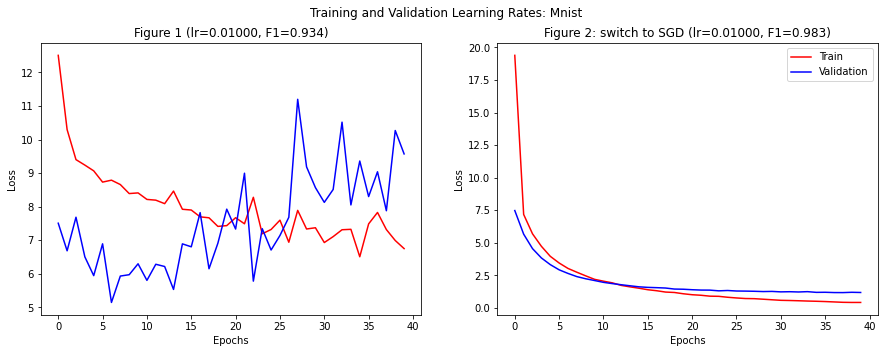

In [5]:
# plot the results
facade.plot([default_res, with_sgd_res])